In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
#setting first column as index and parsing dates, setting first row as column names
df = pd.read_csv('XAUUSD.csv', header=1, index_col='Date', parse_dates=True)
#sorting index because it's inverse
df = df.sort_index()
#imputing missing dates with near values
df = df.resample('D').interpolate()
df.to_csv('XAUUSD2.csv')

In [5]:
df2 = pd.read_csv('XAUUSD2.csv',index_col='Date', parse_dates=True)
df2

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-04,1787.220,1787.730,1785.000,1786.39,-83.0,-0.050
2021-07-05,1786.680,1794.000,1783.800,1791.15,447.0,0.250
2021-07-06,1790.850,1814.890,1789.890,1795.68,483.0,0.270
2021-07-07,1795.280,1809.500,1793.410,1803.22,794.0,0.440
2021-07-08,1803.290,1818.000,1793.900,1803.75,46.0,0.030
...,...,...,...,...,...,...
2023-06-30,1908.710,1922.610,1900.570,1919.20,1049.0,0.550
2023-07-01,1914.505,1921.455,1909.035,1918.45,394.5,0.205
2023-07-02,1920.300,1920.300,1917.500,1917.70,-260.0,-0.140


In [359]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(df['Close'])

# Print the results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')
#p value not very small, so it's non-stationary or seasonal

ADF Statistic: -1.653452817320395
p-value: 0.4552403058585355
Critical Values:
   1%: -3.4393644334758475
   5%: -2.8655182850048306
   10%: -2.568888486973192


In [360]:
figure = px.line(df, x=df.index,
                 y="Close",
                 title='Gold Price over the years')
figure.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_15224\3949417042.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 640x480 with 0 Axes>

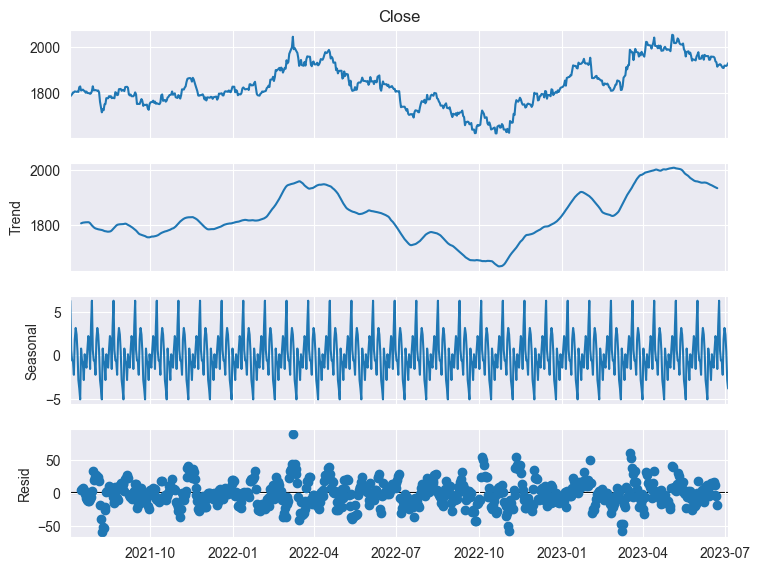

In [361]:
from statsmodels.tsa.seasonal import seasonal_decompose

# result = seasonal_decompose(df["Close"], model='multiplicative', period=24)
result = seasonal_decompose(df["Close"], model='add', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 6)
fig.show()
# i think the repeating pattern in seasonality shows that it's seasonal

In [362]:
from pmdarima import auto_arima

# Find the optimal parameters using auto_arima
auto_arima(df['Close'], seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5872.296, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5870.345, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5872.345, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5872.345, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5868.501, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5867.814, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5870.399, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5870.625, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5868.781, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5868.506, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5865.965, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5870.500, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5870.500, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5868.578, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [363]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 1, 1
# Create the ARIMA model
model = ARIMA(df['Close'], order=(p, d, q))

# Fit the model to the data
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  731
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2929.982
Date:                Sat, 15 Jul 2023   AIC                           5865.965
Time:                        19:41:12   BIC                           5879.744
Sample:                    07-04-2021   HQIC                          5871.281
                         - 07-04-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9401      0.034    -27.386      0.000      -1.007      -0.873
ma.L1          0.9726      0.024     39.836      0.000       0.925       1.020
sigma2       179.3317      6.413     27.963      0.0

In [364]:
start = len(df)
end = len(df) + 30
predictions = results.predict(start, end)
predictions

2023-07-05    1929.693895
2023-07-06    1929.652628
2023-07-07    1929.691425
2023-07-08    1929.654951
2023-07-09    1929.689241
2023-07-10    1929.657004
2023-07-11    1929.687311
2023-07-12    1929.658818
2023-07-13    1929.685605
2023-07-14    1929.660422
2023-07-15    1929.684097
2023-07-16    1929.661839
2023-07-17    1929.682765
2023-07-18    1929.663092
2023-07-19    1929.681587
2023-07-20    1929.664199
2023-07-21    1929.680546
2023-07-22    1929.665178
2023-07-23    1929.679626
2023-07-24    1929.666043
2023-07-25    1929.678813
2023-07-26    1929.666808
2023-07-27    1929.678094
2023-07-28    1929.667483
2023-07-29    1929.677459
2023-07-30    1929.668081
2023-07-31    1929.676897
2023-08-01    1929.668608
2023-08-02    1929.676401
2023-08-03    1929.669075
2023-08-04    1929.675962
Freq: D, Name: predicted_mean, dtype: float64

In [365]:
import plotly.io as pio

fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=900,
    height=600
)
pio.show(fig)

In [369]:
# import pickle
#
# # Save the ARIMA model to a file
# with open('arima_model.pkl', 'wb') as file:
#     pickle.dump(results, file)

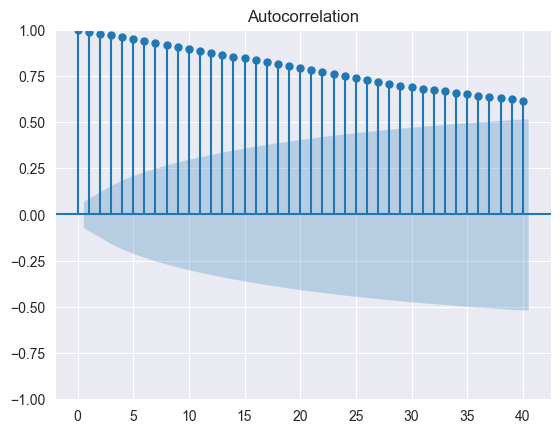

In [367]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

title = 'Autocorrelation'
lags = 40
plot_acf(df['Close'],title=title,lags=lags);

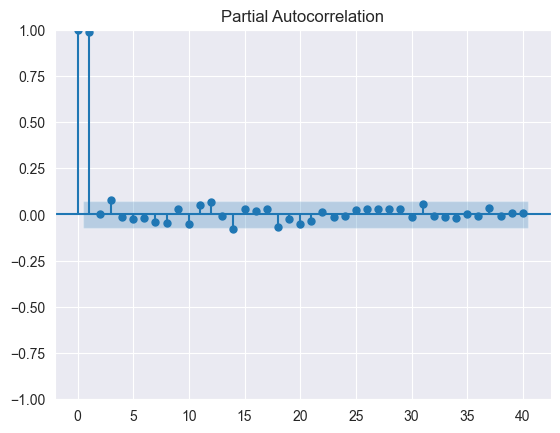

In [368]:
title = 'Partial Autocorrelation'
lags = 40
plot_pacf(df['Close'],title=title,lags=lags);